# Let's compare whether quasi-random numbers work better than random numbers

Import standard packages for arithmetics (_numpy_), data curation (_pandas_) and visualisation (_maplotlib_, _seaborn_). _sobolseq_ is a package for low-discrepancy sequences. 

In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sobol_seq
import matplotlib.pyplot as plt
from pandas import ExcelWriter
plt.style.use('ggplot')

## Let us define some test functions 

<div id="sec:the_test_functions"></div>
One can find the expression of the seven test functions we will be dealing within this notebook in the euqations below

<!--
Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
A1: f(X) = \sum_{j=1}^{k} (-1)^j \, \prod_{l=1}^{j} x_l \
\label{_auto1} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links
-->
<div id="_auto2"></div>

$$
\begin{equation}
A2: f(X) = \prod_{j=1}^{k}
\frac{|{4x_j}-2|+{a_j}}{1+{a_j}} \
\label{_auto2} \tag{2}
\end{equation}
$$
<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
B1: f(X) = \prod_{j=1}^{k} \frac{k-{4x_j}}{k-0.5} \
\label{_auto3} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links
-->
<div id="_auto4"></div>

$$
\begin{equation}
B2: f(X) = \left(1+\frac{1}{k}\right)^k
\prod_{j=1}^{k} \sqrt{x_j} \
\label{_auto4} \tag{4}
\end{equation}
$$

<!--
Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
B3: f(X) = \prod_{j=1}^{k} \frac{|{4x_j}-2|+{b_j}}{1+{b_j}} \
\label{_auto5} \tag{5}
\end{equation}
$$

<!-- Equation labels as ordinary links
-->
<div id="_auto6"></div>

$$
\begin{equation}
C1: f(X) = \prod_{j=1}^{k}
|{4x_j}-2|\
\label{_auto6} \tag{6}
\end{equation}
$$

<!-- Equation labels as
ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
C2: f(X) = 2^k
\prod_{j=1}^{k} x_j \
\label{_auto7} \tag{7}
\end{equation}
$$

In our case we will be working with $k=6$, but different combinations can also be tested.

### Defining the constants and importing the analytical values

In [44]:
k = 6

a2 = np.array([0,0.5,3,9,99,99])
b3 = np.array([6.42,6.42,6.42,6.42,6.42,6.42])

def A1(sm):
    return pd.Series([np.prod(sm.T.iloc[:j+1])*(-1)**(j+1) for j in range(k)]).sum()

def A2(sm):
    return pd.Series([(np.abs(4*sm[j]-2)+a2[j])/(1+a2[j]) for j in range(k)]).product()

def A3(sm):
    return pd.Series([(np.abs(4*sm[j]-2)+a3[j])/(1+a3[j]) for j in range(k)]).product()

def A4(sm):
    return pd.Series([(np.abs(4*sm[j]-2)+a4[j])/(1+a4[j]) for j in range(k)]).product()

def A5(sm):
    return pd.Series([(np.abs(4*sm[j]-2)+a5[j])/(1+a5[j]) for j in range(k)]).product()

def A2b(sm,sn):
    return pd.Series([(np.abs(4*(sm[j]+sn[j]-np.modf(sm[j]+sn[j])[1])-2)+a2[j])/(1+a2[j]) for j in range(k)]).product()

def B1(sm):
    return pd.Series([(k-sm[j])/(k-0.5) for j in range(k)]).product()
        
def B2(sm):
    return ((1+1/k)**k)*pd.Series([sm[j]**(1/k) for j in range(k)]).product()
        
def B3(sm):
    return pd.Series([(np.abs(4*sm[j]-2)+b3[j])/(1+b3[j]) for j in range(k)]).product()
        
def C1(sm):
    return pd.Series([np.abs(4*sm[j]-2) for j in range(k)]).product()
        
def C2(sm):
    return sm.product(axis=1)*2**k

functions = [A1, A2, B1, B2, B3, C1, C2]

AE_df = pd.read_excel('AE_df.xlsx',index_col=0)#the analytical values

def scrambler(q,s):
    return q+s

## Let us define the sample matrices we will be working with

In [45]:
p = 14
run = 1

n = 2

df = pd.DataFrame(sobol_seq.i4_sobol_generate(2*k,-1+2**p))

df2 = pd.DataFrame(np.random.rand(-1+2**p,2*k))

### Let us examine the sample matrices we will be working with

Firstly, the quasi-random Sobol' low-discrepancy-matrix:

In [46]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000
1,0.7500,0.2500,0.7500,0.2500,0.7500,0.2500,0.7500,0.2500,0.2500,0.7500,0.2500,0.7500
2,0.2500,0.7500,0.2500,0.7500,0.2500,0.7500,0.2500,0.7500,0.7500,0.2500,0.7500,0.2500
3,0.3750,0.3750,0.6250,0.1250,0.8750,0.8750,0.1250,0.6250,0.1250,0.8750,0.3750,0.6250
4,0.8750,0.8750,0.1250,0.6250,0.3750,0.3750,0.6250,0.1250,0.6250,0.3750,0.8750,0.1250
5,0.6250,0.1250,0.3750,0.3750,0.1250,0.6250,0.8750,0.8750,0.3750,0.1250,0.1250,0.3750
6,0.1250,0.6250,0.8750,0.8750,0.6250,0.1250,0.3750,0.3750,0.8750,0.6250,0.6250,0.8750
7,0.1875,0.3125,0.3125,0.6875,0.5625,0.1875,0.0625,0.9375,0.1875,0.0625,0.6875,0.8125
8,0.6875,0.8125,0.8125,0.1875,0.0625,0.6875,0.5625,0.4375,0.6875,0.5625,0.1875,0.3125
9,0.9375,0.0625,0.5625,0.9375,0.3125,0.4375,0.8125,0.6875,0.4375,0.8125,0.9375,0.0625


Then, the random matrix:

In [47]:
df2.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.665489,0.314372,0.008252,0.861240,0.076221,0.936771,0.139710,0.970632,0.695857,0.999294,0.743105,0.863771
1,0.957636,0.616272,0.532206,0.014004,0.258747,0.223746,0.691349,0.117956,0.671934,0.529455,0.586889,0.772246
2,0.604900,0.969117,0.907481,0.942575,0.309740,0.739441,0.774300,0.210526,0.040386,0.252723,0.985783,0.236105
3,0.280258,0.598586,0.228686,0.742220,0.601102,0.574514,0.797845,0.427908,0.430633,0.515575,0.956883,0.432491
4,0.881414,0.837024,0.721257,0.912905,0.911455,0.834270,0.848525,0.103550,0.515229,0.204195,0.556791,0.750894
5,0.799715,0.853624,0.981303,0.295137,0.897162,0.913808,0.643459,0.916819,0.923370,0.276597,0.668106,0.444066
6,0.294482,0.875949,0.172983,0.409516,0.455573,0.024981,0.906263,0.059483,0.902390,0.085806,0.270778,0.101146
7,0.987462,0.391198,0.796057,0.990029,0.331827,0.932333,0.461191,0.154951,0.014012,0.924123,0.008489,0.003564
8,0.005084,0.821204,0.487179,0.001897,0.619064,0.189030,0.372717,0.099897,0.927026,0.864434,0.259513,0.797610
9,0.456755,0.725212,0.605185,0.077640,0.716899,0.556429,0.823123,0.606211,0.849363,0.618348,0.690281,0.176263


## Let us now run an uncertainty analysis so as to compute...?

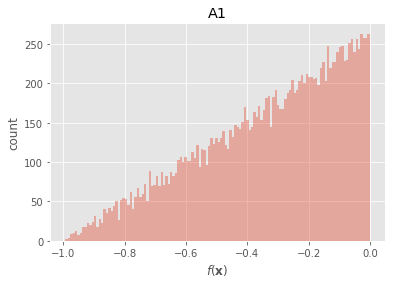

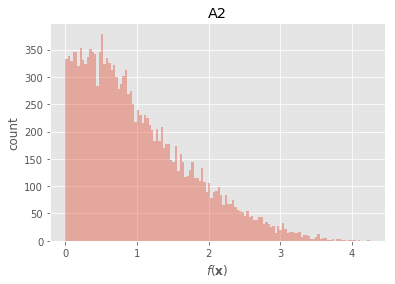

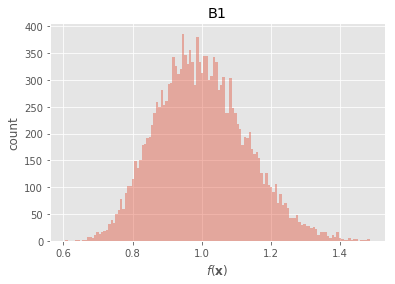

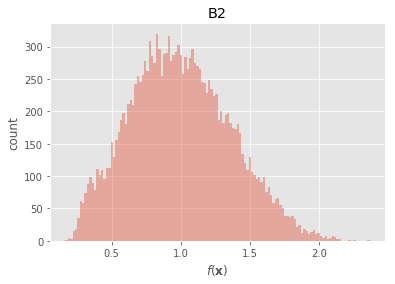

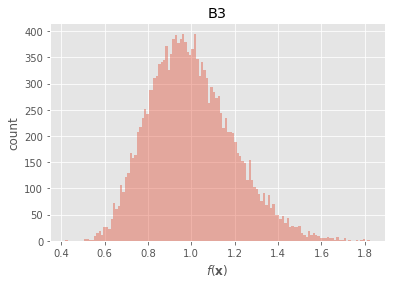

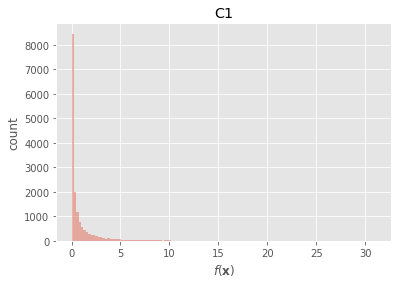

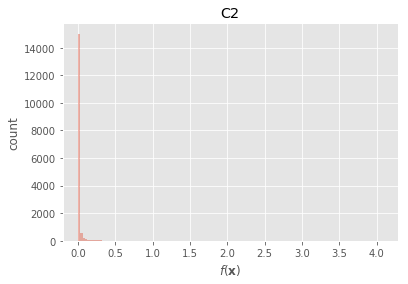

In [48]:
for f in functions:
    sns.distplot(f(df),bins=2**7,kde=False)
    plt.xlabel('$f(\mathbf{x})$')
    plt.ylabel('count')
    plt.title(f.__name__)
    plt.show()

### Let us define the sample and scrambled matrices
Let us have a look at the first sample matrix

In [49]:
A = df.iloc[:,:k]
A_rand = df2.iloc[:,:k]
A.tail()

,0,1,2,3,4,5
16378,0.375061,0.674988,0.877747,0.297058,0.116272,0.335632
16379,0.250061,0.049988,0.002747,0.672058,0.741272,0.460632
16380,0.750061,0.549988,0.502747,0.172058,0.241272,0.960632
16381,0.500061,0.299988,0.752747,0.922058,0.491272,0.210632
16382,0.000061,0.799988,0.252747,0.422058,0.991272,0.710632


And here it follow the second

In [50]:
B = df.iloc[:,k:]
B_rand = df2.iloc[:,k:]
B.tail()

,6,7,8,9,10,11
16378,0.006042,0.106018,0.394592,0.019226,0.985168,0.534607
16379,0.381042,0.481018,0.519592,0.644226,0.360168,0.409607
16380,0.881042,0.981018,0.019592,0.144226,0.860168,0.909607
16381,0.631042,0.231018,0.769592,0.394226,0.110168,0.659607
16382,0.131042,0.731018,0.269592,0.894226,0.610168,0.159607


How can the sensitivity indices be estimated? **Monte Carlo** simulations.

<!-- Equation labels as ordinary links
-->
<div id="_auto8"></div>

$$
\begin{equation}
S_j = \frac{V_{j}(E_{\sim j}(Y|X_j))}{V(Y)} \simeq \frac{1}{N_T} \sum_{j=1}^{N_T} f(B)_N(f(A_B^j)_N - f(A)_N)
\label{_auto8} \tag{8}
\end{equation}
$$

<!-- Equation labels as ordinary links
-->
<div id="_auto9"></div>

$$
\begin{equation}
T_j = \frac{E_{\sim j}(V_{j}(Y|X_{\sim j}))}{V(Y)} \simeq \frac{1}{2N_T} \sum_{j=1}^{N_T} (f(A)_N - f(A_B^j)_N)^2
\label{_auto9} \tag{9}
\end{equation}
$$

In [51]:
B = B.T.reset_index(drop=True).T

scrambled_matrices = []
for j in range(k):
    rs = df.copy()
    rs[j] = rs[scrambler(j,k)]
    rs = rs.iloc[:,:k]
    scrambled_matrices.append(rs)
    print(rs.tail())

              0         1         2         3         4         5
16378  0.006042  0.674988  0.877747  0.297058  0.116272  0.335632
16379  0.381042  0.049988  0.002747  0.672058  0.741272  0.460632
16380  0.881042  0.549988  0.502747  0.172058  0.241272  0.960632
16381  0.631042  0.299988  0.752747  0.922058  0.491272  0.210632
16382  0.131042  0.799988  0.252747  0.422058  0.991272  0.710632
              0         1         2         3         4         5
16378  0.375061  0.106018  0.877747  0.297058  0.116272  0.335632
16379  0.250061  0.481018  0.002747  0.672058  0.741272  0.460632
16380  0.750061  0.981018  0.502747  0.172058  0.241272  0.960632
16381  0.500061  0.231018  0.752747  0.922058  0.491272  0.210632
16382  0.000061  0.731018  0.252747  0.422058  0.991272  0.710632
              0         1         2         3         4         5
16378  0.375061  0.674988  0.394592  0.297058  0.116272  0.335632
16379  0.250061  0.049988  0.519592  0.672058  0.741272  0.460632
16380  0.7

In [52]:
B_rand = B_rand.T.reset_index(drop=True).T

scrambled_matrices_rand = []
for j in range(k):
    rs_rand = df2.copy()
    rs_rand[j] = rs_rand[scrambler(j,k)]
    rs_rand = rs_rand.iloc[:,:k]
    scrambled_matrices_rand.append(rs_rand)

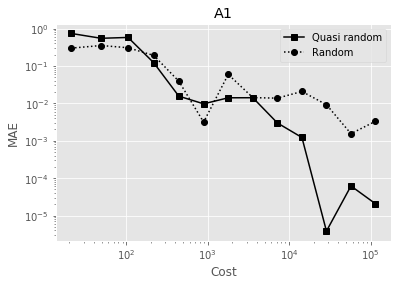

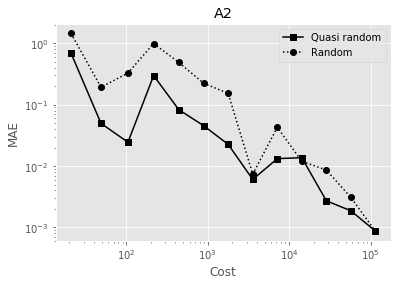

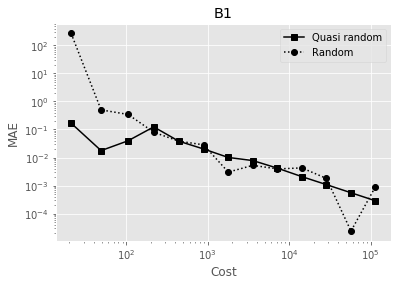

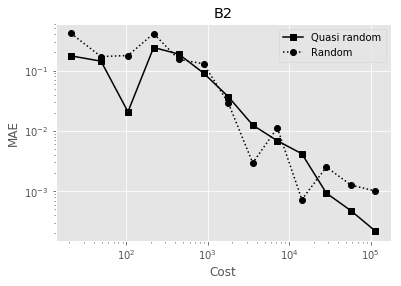

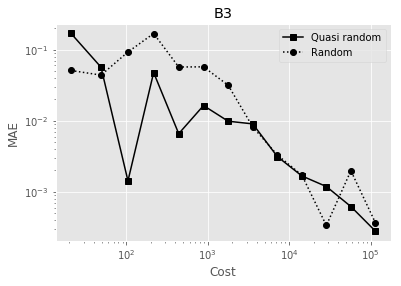

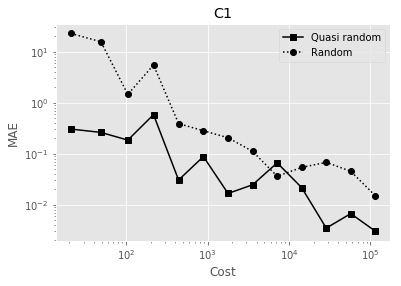

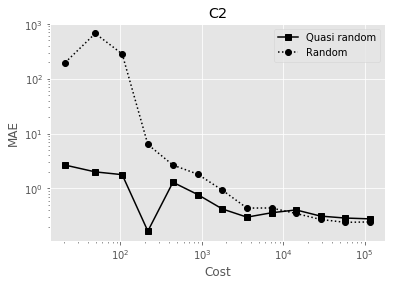

In [53]:
for f in functions:
    elementary_effect = []
    elementary_effect_rand = []
    elementary_effect_FO = []
    elementary_effect_FO_rand = []
    
    ea = pd.DataFrame(f(df.iloc[:,:k]))
    ea_rand = pd.DataFrame(f(df2.iloc[:,:k]))
    
    ee_df =[]
    ee_df_rand =[]
    ee_df_FO =[]
    ee_df_FO_rand =[]
    
    # elementary effects are calculated for each of the six variables, first and total-order effects are calculated for quasi-
    #random and random sequences
    
    for j in range(k):
        ee = pd.DataFrame(0.5*(f(df)-f(scrambled_matrices[j]))**2,columns=[j])
        ee_rand = pd.DataFrame(0.5*(f(df2)-f(scrambled_matrices_rand[j]))**2,columns=[j])
        ee_fo = pd.DataFrame(f(B)*(f(scrambled_matrices[j])-f(df)),columns=[j])
        ee_fo_rand = pd.DataFrame(f(B_rand)*(f(scrambled_matrices_rand[j])-f(df2)),columns=[j])
        
        elementary_effect.append(ee.expanding(1).mean())
        elementary_effect_rand.append(ee_rand.expanding(1).mean())
        elementary_effect_FO.append(ee_fo.expanding(1).mean())
        elementary_effect_FO_rand.append(ee_fo_rand.expanding(1).mean())
    
    elementary_effect_df = pd.concat(elementary_effect,axis=1)
    elementary_effect_df_rand = pd.concat(elementary_effect_rand,axis=1)
    elementary_effect_df_fo = pd.concat(elementary_effect_FO,axis=1)
    elementary_effect_df_fo_rand = pd.concat(elementary_effect_FO_rand,axis=1)
    
    #here the variance is calculated -> denominator
    Var_df = ea.expanding(1).var(ddof=0)
    Var_df_rand = ea_rand.expanding(1).var(ddof=0)
    
    #the absolute error is calculated by subtracting the analytical values    
    AE = np.abs(elementary_effect_df.div(Var_df,axis=0) - AE_df.loc[f.__name__])
    AE_rand = np.abs(elementary_effect_df_rand.div(Var_df,axis=0) - AE_df.loc[f.__name__])
    
    #the mean is finally assessed over all variables
    MAE = AE.mean(axis=1)
    MAE_rand = AE_rand.mean(axis=1)
    
    #index is re-set as per the computational cost
    MAE.index = (MAE.index+1)*(k+1)
    MAE_rand.index = MAE.index
    
    #print out the results
    plt.loglog(MAE.index[[-2+2**s for s in range(2,p+1)]], MAE.iloc[[-2+2**s for s in range(2,p+1)]], c='k', 
               marker = 's', linestyle='-',label = 'Quasi random')
    plt.loglog(MAE_rand.index[[-2+2**s for s in range(2,p+1)]], MAE_rand.iloc[[-2+2**s for s in range(2,p+1)]], c='k', 
               marker = 'o', linestyle=':',label = 'Random')
    plt.xlabel('Cost')
    plt.ylabel('MAE')
    plt.title(f.__name__)
    plt.legend()
    plt.show()